# Analyzing Startup Profits with Multiple Linear Regression and Backward Elimination Modeling

For this project, we will be analyzing the profits generated by 50 startups. The data we are provided includes the startup's location, research and development costs, administrative costs, marketing costs, and profit generated. Furthermore, we will be building a regression model to see which variables play a significant role in the amount of profit generated. We will use backward elimination to build an efficient model.

This dataset was provided by Kirill Eremenko.

## Step 1: Import python packages and datasets

In [5]:
# Data library imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Dataset import
dataset = pd.read_csv('50_Startups.csv')

## Step 2: Generate descriptive statistics using .head(), .describe(), and .info()

In [7]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


#### Fortunately, we do not have any missing data. Therefore, we can proceed with exploratory data analysis

## Step 3: Exploratory data analysis

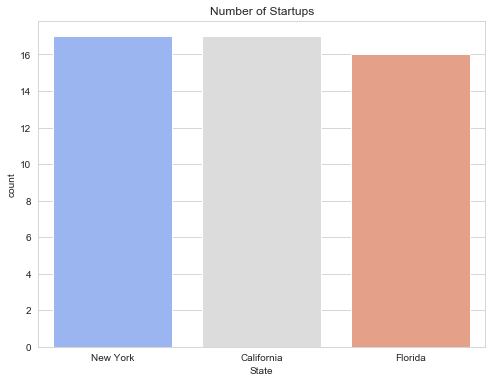

In [10]:
plt.figure(figsize=(8,6))
count_plt = sns.countplot(x="State", data=dataset, palette="coolwarm")
count_plt.set_title('Number of Startups')
plt.show()

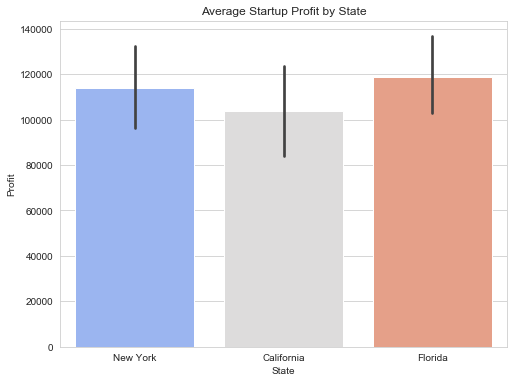

In [11]:
plt.figure(figsize=(8,6))
profit_plt = sns.barplot(x="State", y="Profit", data=dataset, palette="coolwarm")
profit_plt.set_title('Average Startup Profit by State')
plt.show()

Let's look at spending in each category by State.

Text(0.5, 1.0, 'Average Startup Marketing Spend by State')

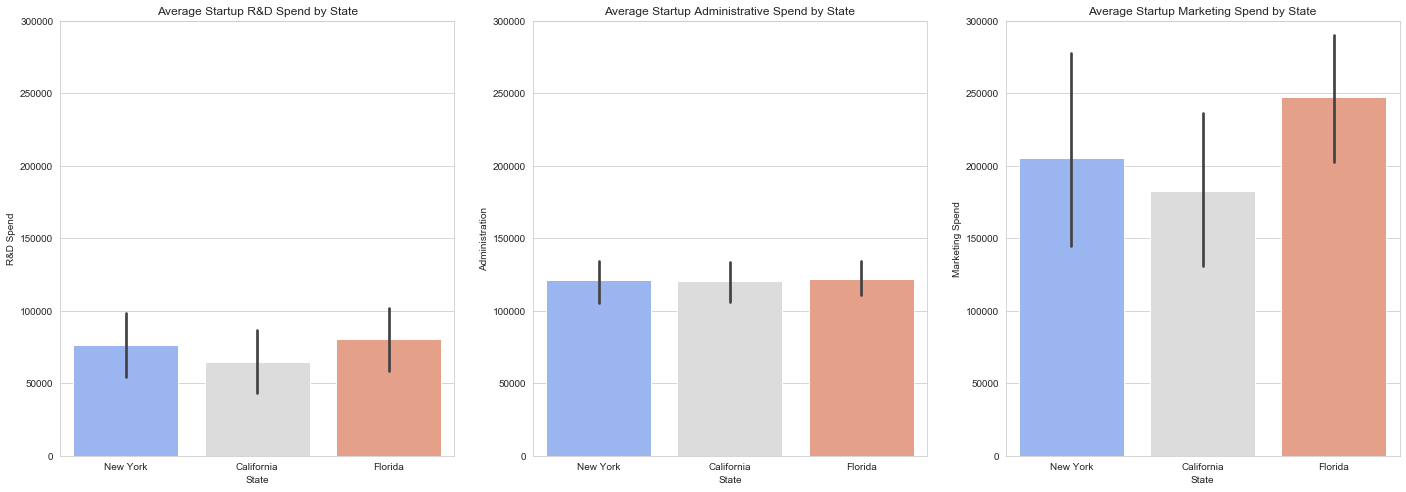

In [12]:
# Set up the matplotlib figure
figure, axes = plt.subplots(1, 3, figsize=(24, 8), sharex=True, sharey=False)


rd = sns.barplot(x="State", y="R&D Spend", data=dataset, palette="coolwarm", ax=axes[0])
rd.axes.set_ylim(0,300000)
axes[0].set_title('Average Startup R&D Spend by State')

admin = sns.barplot(x="State", y="Administration", data=dataset, palette="coolwarm", ax=axes[1])
admin.axes.set_ylim(0,300000)
axes[1].set_title('Average Startup Administrative Spend by State')

marketing = sns.barplot(x="State", y="Marketing Spend", data=dataset, palette="coolwarm",ax=axes[2])
marketing.axes.set_ylim(0,300000)
axes[2].set_title('Average Startup Marketing Spend by State')

To my surprise, on average, each state's startups spend nearly the same amount on administrative fees per year. However, startups in Florida spend the most on average on R&D and Marketing. Startups in California spend the least on average on R&D and Marketing.

#### Next, let's look into the correlation between costs and profit.

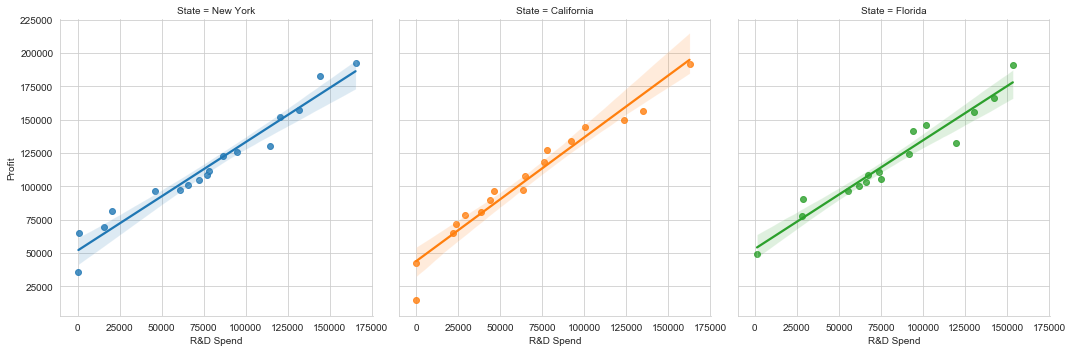

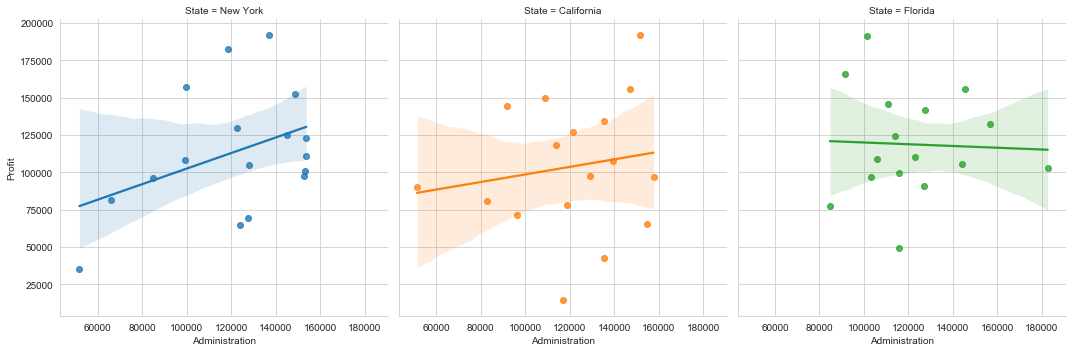

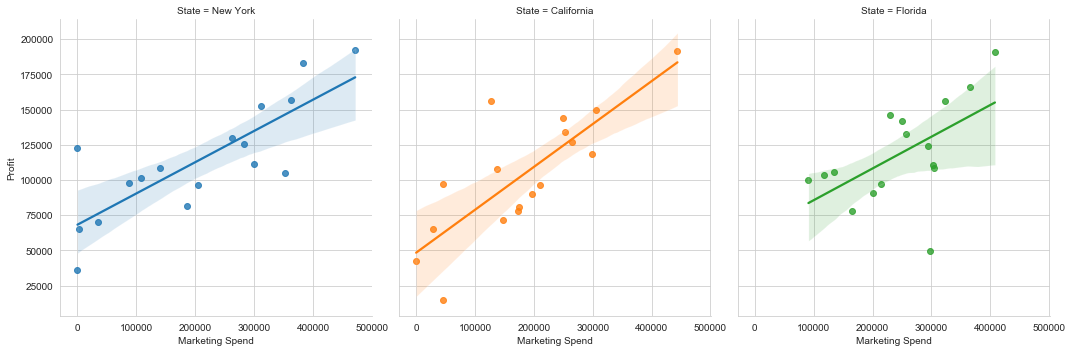

In [13]:
sns.lmplot('R&D Spend', 'Profit', data=dataset, hue='State' ,col='State')
sns.lmplot('Administration', 'Profit', data=dataset,hue='State' , col='State')
sns.lmplot('Marketing Spend', 'Profit', data=dataset,hue='State' , col='State')
#sns.lmplot('Administration', 'Profit', data=dataset[dataset.State == 'New York'])

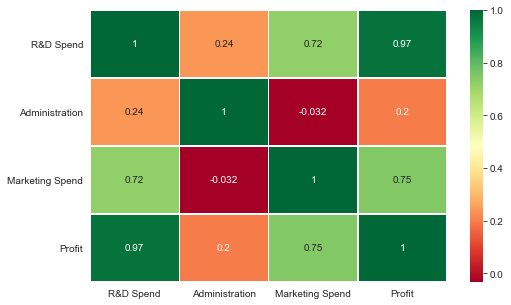

In [14]:
plt.figure(figsize = (8,5))
sns.heatmap(dataset.corr(), annot=True, cmap="RdYlGn",linewidths=.5)

#### R&D Spend has a strong positive correlation with Profit. On the other hand, Administration Spend has little to no correlation with Profit.

#### Let's begin building our regression model.

## Step 4: Setting up our model

### Encoding categorical data
First, we have to create dummy variables for the State column.

In [15]:
#create categorical variables and drop variables
dataset=pd.get_dummies(dataset, columns=["State"])

# dropping this dummy variable to avoid multicollinearity
# the State_Florida variable now serves as a reference point 
# the coefficients for State_Cali and State_NY will represent the difference between that state and Florida if all other variables stay the same
dataset.drop('State_Florida', axis=1, inplace=True)
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,0,0


### Using backward elimination to select only significant variables and optimize our model

In [16]:
import statsmodels.formula.api as sm

In [19]:
# need to append row of ones for the y_intercept
Y = dataset['Profit']
X = dataset.loc[:, dataset.columns != 'Profit']
X = np.append(arr=np.ones((len(X),1)).astype(int), values=X, axis=1)

In [20]:
# we can use this to toggle and eliminate each insignificant value
# our chosen significane level is 0.05
X_opt = X[:, [0,1,2,3,4,5]]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           1.34e-27
Time:                        11:32:50   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
x1             0.8060      0.046     17.369      0.000       0.712       0.900
x2            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x3             0.0270      0.017      1.574      0.123      -0.008       0.062
x4          -198.7888   3371.007     -0.059      0.953   -6992.607    6595.030
x5          -240.6758   3338.857     -0.072      0.943   -6969.701    6488.349
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.56e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Our location variables have the highest p-values above our significance level. Let's remove them and run the model again.

In [21]:
# remove x4 and x5
# our chosen significane level is 0.05
X_opt = X[:, [0,1,2,3]]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           4.53e-30
Time:                        11:32:55   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Our Adj R-squared slightly increased; therefore, we know that this model contains less junk variables. Our administrative cost variable has the highest p-value above our significance level. Let's remove it and run the model again.

In [22]:
# remove x2
# our chosen significance level is 0.05
# selecting constant, R&D spend, and Marketing Spend
X_opt = X[:, [0,1,3]]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           2.16e-31
Time:                        11:32:58   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Our Adj R-squared did not change after removing our administrative cost variable; however, our F-statistics increased indicating that our latest model is farther from being insiginificant

Let's build our sklearn regression model with the narrowed list of only significant independent variables

### Splitting the dataset into the Training set and Test set

In [28]:
Y = dataset['Profit']
X = dataset[['R&D Spend', 'Marketing Spend']]
X.head()

,R&D Spend,Marketing Spend
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### Training the Multiple Linear Regression model on the Training set

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Predicting the Test set results and checking accuracy

In [31]:
Y_pred = regressor.predict(X_test)

In [32]:
regressor.coef_

array([0.7886183 , 0.03257663])

In [33]:
regressor.intercept_

46346.33876123656

##### For every dollar we spend on R&D, we can expect our profit to increase by $0.79. 

##### Similarly, for every dollar we spend on marketing, we can expect our profit to increase by $0.03.

In [34]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.9474386447268488

Our model's R-squared value is approximately 0.95. Therefore, we can say that our regression model represents most the proportion of the variance for the dependent variable.

In [35]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, Y_pred)**.5

8198.79719078849

The root mean squared error was ~8,200 

Since the root mean squared error (RMSE) corresponds approximately to the standard deviation.

We can say that a startup's profit won't vary more than 2 times the root mean squared error 95% of the time. 

##### Thus, we can reasonably expect a startup's profit to be within $16,400 of our line fit.